In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
base_skin_dir = 'data'
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import compute_class_weight
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Concatenate, concatenate, Input
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers. normalization import BatchNormalization
import keras
import itertools
from keras.utils.np_utils import to_categorical

from PIL import Image

Using TensorFlow backend.


In [2]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [3]:
tile_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
#tile_df = tile_df.sample(10000)
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df['localization'] = pd.Categorical(tile_df['localization']).codes
tile_df['sex'] = pd.Categorical(tile_df['sex']).codes

In [12]:
tile_df.columns

tile_df.head()
#tile_df.cell_type_idx
class_weight

array([ 4.38,  2.78,  1.3 , 12.44,  0.21,  1.29, 10.08])

In [8]:
tile_df.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,path,cell_type
count,5000,5000,5000,5000,5000,5000,5000
unique,4264,5000,7,4,3,5000,7
top,HAM_0001721,ISIC_0030571,nv,histo,male,data/HAM10000_images_part_2/ISIC_0031473.jpg,Melanocytic nevi
freq,4,1,3355,2691,2720,1,3355


In [4]:
tile_df['image'] = tile_df['path'].map(lambda x: np.asarray(Image.open(x).resize((60,45))))       

In [5]:
# see the image size distribution
tile_df['image'].map(lambda x: x.shape).value_counts()

(45, 60, 3)    10015
Name: image, dtype: int64

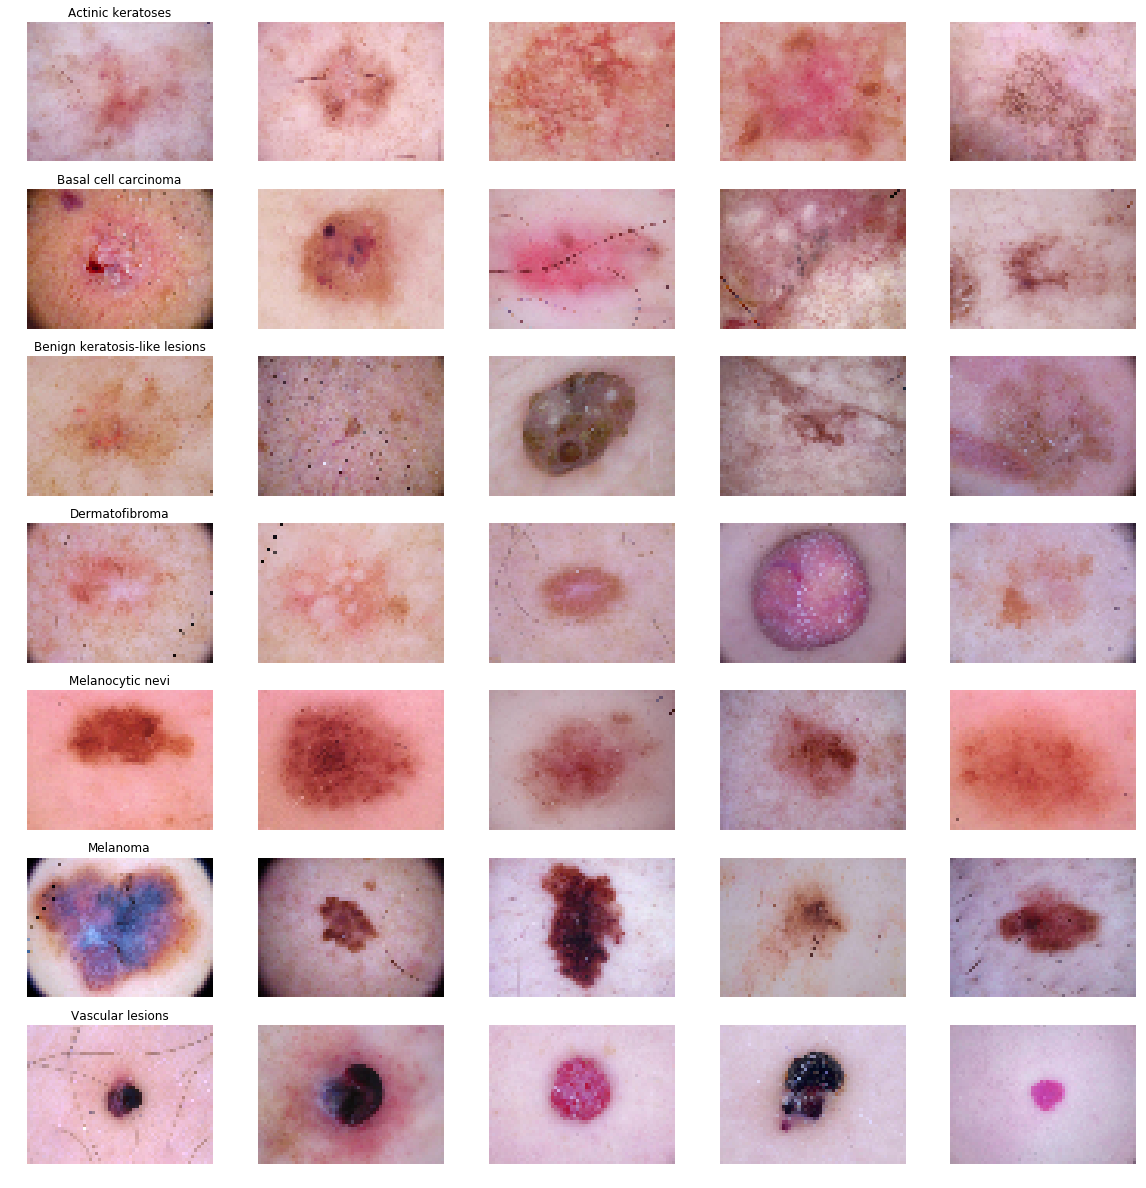

In [6]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [5]:
datagen = ImageDataGenerator(rotation_range=rotation_angle, 
                             horizontal_flip=horizontal_flip,
                             vertical_flip=vertical_flip,
                             width_shift_range=width_shift_range,
                             height_shift_range=height_shift_range)

model.fit_generator(generator=datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size * 2,
                    epochs=12,
                    initial_epoch=0,
                    verbose=1,
                    validation_data=(x_valid, y_valid),
                    callbacks=callbacks,
                    workers=8,
                    use_multiprocessing=True)

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: cell_type_idx, dtype: int64

In [8]:
#tile_df['cell_type_idx'].value_counts()
#tile_df[tile_df['cell_type']=='Vascular lesions']

In [8]:
from sklearn.utils import resample

tile_df_min1 = tile_df[tile_df['cell_type']=='Melanoma']
tile_df_min2 = tile_df[tile_df['cell_type']=='Benign keratosis-like lesions']
tile_df_min3 = tile_df[tile_df['cell_type']=='Basal cell carcinoma']
tile_df_min4 = tile_df[tile_df['cell_type']=='Actinic keratoses']
tile_df_min5 = tile_df[tile_df['cell_type']=='Vascular lesions']
tile_df_min6 = tile_df[tile_df['cell_type']=='Dermatofibroma']
tile_df_maj = tile_df[tile_df['cell_type']=='Melanocytic nevi']

# Upsample minority class
df_minority_upsampled1 = resample(tile_df_min1, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=42) # reproducible results
df_minority_upsampled2 = resample(tile_df_min2, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=42) # reproducible results
df_minority_upsampled3 = resample(tile_df_min3, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=42) # reproducible results
df_minority_upsampled4 = resample(tile_df_min4, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=42) # reproducible results
df_minority_upsampled5 = resample(tile_df_min5, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=42) # reproducible results
df_minority_upsampled6 = resample(tile_df_min6, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=42) # reproducible results
df_majority_downsampled6 = resample(tile_df_maj, 
                                 replace=False,     # sample with replacement
                                 n_samples=2500,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority_downsampled6, df_minority_upsampled1, df_minority_upsampled2,
                         df_minority_upsampled3, df_minority_upsampled4, df_minority_upsampled5, 
                         df_minority_upsampled6])


In [9]:
df_upsampled['cell_type_idx'].value_counts()

4    2500
6    2000
5    2000
3    2000
2    2000
1    2000
0    2000
Name: cell_type_idx, dtype: int64

In [5]:
y = tile_df.cell_type_idx

from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(tile_df, y, test_size=0.25, random_state = 42)

x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_add = np.asarray([x_train_o['localization'], x_train_o['sex']])
x_test_add = np.asarray([x_test_o['localization'], x_test_o['sex']])

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [28]:
#x_train_add.ndim
#x_test_add.ndim
len(x_train_add[1])
#len(x_train)

4500

In [6]:
img_input = Input(shape=(90, 120,  3))
conv1 = Conv2D(32, kernel_size = (3, 3), activation='relu')(img_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
batch1 = BatchNormalization()(pool1)
conv2 = Conv2D(64, kernel_size = (3, 3), activation='relu')(batch1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
batch2 = BatchNormalization()(pool2)
conv3 = Conv2D(96, kernel_size = (3, 3), activation='relu')(batch2)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
batch3 = BatchNormalization()(pool3)
conv4 = Conv2D(96, kernel_size = (3, 3), activation='relu')(batch3)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
batch4 = BatchNormalization()(pool4)
drop1 = Dropout(0.2)(batch4)
flat1 = Flatten()(drop1)
dense1 = Dense(128, activation='relu')(flat1)
drop2 = Dropout(0.3)(dense1)
dense2 = Dense(64, activation='relu')(drop2)
drop3 = Dropout(0.4)(dense2)
#dense2 = Dense(64, activation='relu')(drop3)
#drop3 = Dropout(0.5)(dense2)


additional_features = Input(shape=(1,))
add_dense1 = Dense(64, activation='relu')(additional_features)

merged1 = concatenate([drop3, add_dense1], axis=-1)
out1 = Dense(64, activation='relu')(merged1)

additional_features2 = Input(shape=(1,))
add_dense2 = Dense(64, activation='relu')(additional_features2)

merged2 = concatenate([out1, add_dense2], axis=-1)

out = Dense(7, activation='softmax')(merged2)
model = Model([img_input, additional_features, additional_features2], out)

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 90, 120, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 88, 118, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 44, 59, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 44, 59, 32)   128         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [6]:
img_input = Input(shape=(90, 120,  3))
conv1 = Conv2D(32, kernel_size = (3, 3), activation='relu')(img_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size = (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
drop1 = Dropout(0.2)(pool2)
flat1 = Flatten()(drop1)
dense1 = Dense(128, activation='relu')(flat1)
drop2 = Dropout(0.3)(dense1)
dense2 = Dense(64, activation='relu')(drop2)
drop3 = Dropout(0.4)(dense2)

out = Dense(7, activation='softmax')(drop3)
model = Model([img_input], out)

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 90, 120, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 88, 118, 32)       896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 37632)             0         
__________

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(45, 60,  3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation = 'softmax'))


model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy , metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 43, 58, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 29, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 29, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 13, 64)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 13, 64)         256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 11, 96)         55392     
__________

In [13]:
batch_size = 100 # Todo: experiment with this variable more
epochs = 1

history = model.fit([x_train, x_train_o['localization'], x_train_o['sex']] , y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    class_weight= class_weight,
                    validation_data=([x_test, x_test_o['localization'],  x_test_o['sex']], y_test))

score = model.evaluate([x_test, x_test_o['localization'],  x_test_o['sex']], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 3 arrays: [array([[[[247, 167, 176],
         [246, 169, 179],
         [245, 173, 177],
         ...,
         [246, 173, 184],
         [245, 178, 187],
         [249, 170, 176]],

        [[245, 159, 168],
 ...

In [22]:
compute_class_weight('balanced', [0,1,2,3,4,5,6], tile_df.cell_type_idx)

array([ 4.38,  2.78,  1.3 , 12.44,  0.21,  1.29, 10.08])

In [11]:
batch_size = 200 # Todo: experiment with this variable more
epochs = 10
#{1:4.38,  2:2.78,  3:1.3 , 4:12.44,  5:10.21,  6:1.29, 7:10.08}

class_weight = compute_class_weight('balanced', [0,1,2,3,4,5,6], tile_df.cell_type_idx)

history = model.fit([x_train] , y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    class_weight= {0:4.38,  1:2.78,  2:1.3 , 3:12.44,  4:0.21,  5:1.29, 6:10.08},
                    validation_data=([x_test], y_test))

score = model.evaluate([x_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 7511 samples, validate on 2504 samples
Epoch 1/10
7511/7511 [==============================] - 20s 3ms/step - loss: 1.0832 - acc: 0.5574 - val_loss: 1.0904 - val_acc: 0.5459
Epoch 2/10
7511/7511 [==============================] - 20s 3ms/step - loss: 0.9892 - acc: 0.5855 - val_loss: 0.9583 - val_acc: 0.5903
Epoch 3/10
7511/7511 [==============================] - 20s 3ms/step - loss: 0.8871 - acc: 0.6010 - val_loss: 1.0592 - val_acc: 0.5819
Epoch 4/10
7511/7511 [==============================] - 20s 3ms/step - loss: 0.8438 - acc: 0.6277 - val_loss: 1.1546 - val_acc: 0.5411
Epoch 5/10
7511/7511 [==============================] - 20s 3ms/step - loss: 0.7902 - acc: 0.6263 - val_loss: 0.9921 - val_acc: 0.5835
Epoch 6/10
7511/7511 [==============================] - 20s 3ms/step - loss: 0.7680 - acc: 0.6283 - val_loss: 0.8880 - val_acc: 0.6490
Epoch 7/10
7511/7511 [==============================] - 20s 3ms/step - loss: 0.7617 - acc: 0.6271 - val_loss: 0.9244 - val_acc: 0.6182
Epoch 8

In [12]:
#y_score = model.predict([x_test, x_test_o['localization'],  x_test_o['sex']])
y_score = model.predict(x_test)

Confusion matrix, without normalization
[[  49    9   21    1    0    6    0]
 [  27   54   14   10    2    6    1]
 [  31    5  195    3   23   27    1]
 [   6    5    5   11    5    0    0]
 [  20   29  228   12 1074  292   13]
 [  19    6   73    3   28  161    2]
 [   0    1    0    2    1    2   21]]
Normalized confusion matrix
[[0.57 0.1  0.24 0.01 0.   0.07 0.  ]
 [0.24 0.47 0.12 0.09 0.02 0.05 0.01]
 [0.11 0.02 0.68 0.01 0.08 0.09 0.  ]
 [0.19 0.16 0.16 0.34 0.16 0.   0.  ]
 [0.01 0.02 0.14 0.01 0.64 0.18 0.01]
 [0.07 0.02 0.25 0.01 0.1  0.55 0.01]
 [0.   0.04 0.   0.07 0.04 0.07 0.78]]


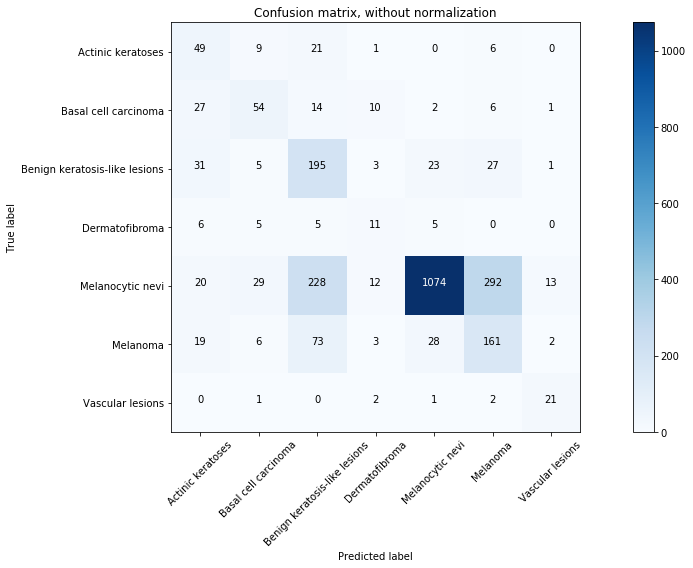

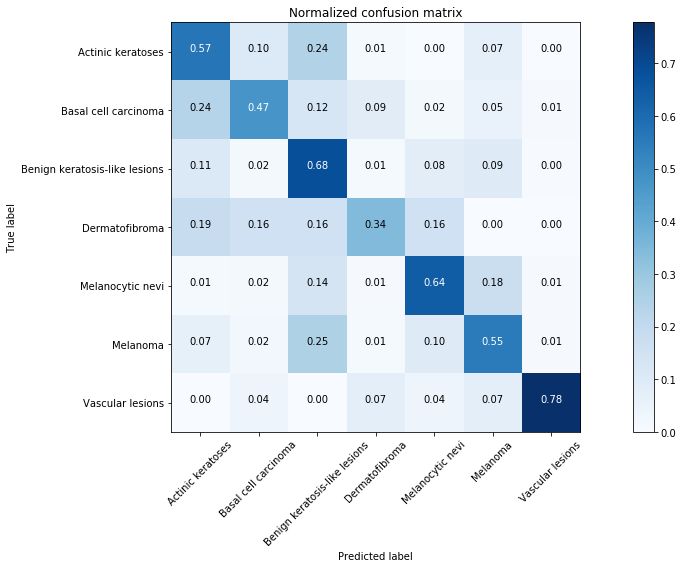

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


predict_class = np.argmax(y_score, axis=1)
test_class = np.argmax(y_test, axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_class, predict_class)
np.set_printoptions(precision=2)
class_name = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Dermatofibroma',
             'Melanocytic nevi', 'Melanoma', 'Vascular lesions']

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=class_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=class_name, normalize=True, title='Normalized confusion matrix')

plt.show()

In [14]:
from sklearn.metrics import balanced_accuracy_score


balanced_accuracy_score(test_class, predict_class)

0.5777778159400541

In [18]:
lesion_type_dict.values()
tile_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path', 'cell_type', 'cell_type_idx', 'image'],
      dtype='object')

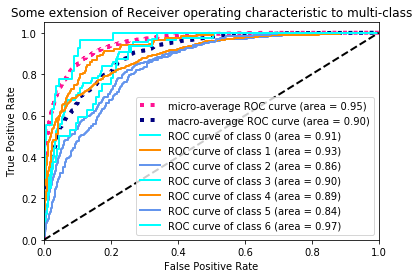

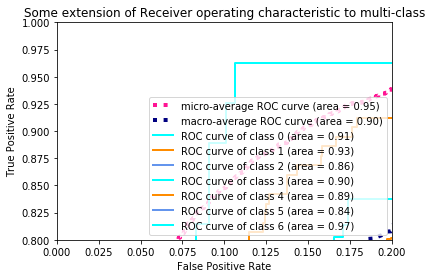

In [19]:

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 7

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
X, y = make_classification(n_classes=7, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
Resampled dataset shape Counter({0: 900, 1: 900})